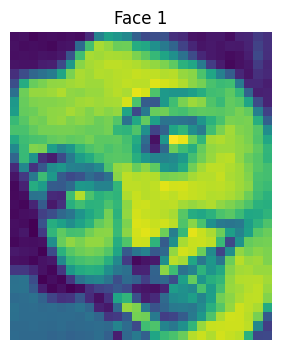

In [3]:
from deepface import DeepFace
from retinaface import RetinaFace
from PIL import Image
import matplotlib.pyplot as plt

# Extract faces
faces = DeepFace.extract_faces(img_path="fer2013/train/happiness/Training_158782.jpg", detector_backend="retinaface", align=True)

# Load the original image
original_image = Image.open("fer2013/train/happiness/Training_158782.jpg")

# Process and display each detected face
for i, face in enumerate(faces):
    # Get the bounding box of the detected face
    facial_area = face['facial_area']
    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    x1, y1, x2, y2 = x, y, x + w, y + h

    # Crop the face region
    cropped_face = original_image.crop((x1, y1, x2, y2))

    # Display the cropped face
    plt.figure(figsize=(4, 4))
    plt.imshow(cropped_face)
    plt.axis("off")
    plt.title(f"Face {i + 1}")
    plt.show()


In [4]:
import os
from retinaface import RetinaFace
from deepface import DeepFace
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Paths
input_dir = ""  # Directory containing images
valid_extensions = {".png", ".jpg", ".jpeg"}
output_size = (64, 64)

# Iterate through all images in the directory
for filename in os.listdir(input_dir):
    file_path = os.path.join(input_dir, filename)

    # Skip non-image files
    if not filename.lower().endswith(tuple(valid_extensions)):
        print(f"Skipping non-image file: {filename}")
        continue
    try:
        # Extract faces from the image
        # faces = RetinaFace.extract_faces(img_path=file_path, align=True)
        face_objs = DeepFace.extract_faces(img_path=file_path, detector_backend="retinaface", align=True)
        if len(face_objs) == 0:
            print(f"No faces detected in {filename}. Skipping.")
            continue
        else:  
            # Assume one face per image; replace the image with the first detected face
            cropped_face = face_objs[0]['face']  # Take the first detected face
            resized_face = cv2.resize(cropped_face, output_size)  # Convert to PIL Image
    
            # Save the face back to the same file path
            cv2.imwrite(file_path, resized_face)
            print(f"Replaced {filename} with detected face.")
    except Exception as e:
        print(f"Error processing {filename}: {e}")


FileNotFoundError: [Errno 2] No such file or directory: ''

In [38]:
import os
from PIL import Image
from deepface import DeepFace

def analyze_dataset(base_dir, detector_backend="retinaface"):
    results = {}
    
    for split in ["train", "test"]:  # Iterate over train and test directories
        split_path = os.path.join(base_dir, split)
        results[split] = {}
        
        for emotion in os.listdir(split_path):  # Iterate over emotion directories
            emotion_path = os.path.join(split_path, emotion)
            if not os.path.isdir(emotion_path):
                continue
            
            total_images = 0
            no_face_images = 0
            
            for image_file in os.listdir(emotion_path):  # Iterate over image files
                image_path = os.path.join(emotion_path, image_file)
                if not os.path.isfile(image_path):
                    continue
                
                total_images += 1
                try:
                    # Try to extract faces from the image
                    faces = DeepFace.extract_faces(img_path=image_path, detector_backend=detector_backend, align=True)
                    if len(faces) == 0:
                        no_face_images += 1
                except Exception as e:
                    # If there's an error (e.g., invalid image), count it as no face
                    no_face_images += 1
            
            # Store results for this emotion
            results[split][emotion] = {
                "total_images": total_images,
                "no_face_images": no_face_images
            }
    
    return results

# Path to the FER2013 dataset directory
fer2013_path = "fer2013"

# Analyze the dataset
dataset_analysis = analyze_dataset(fer2013_path)

# Print the results
for split, emotions in dataset_analysis.items():
    print(f"\n{split.upper()} DATASET:")
    for emotion, stats in emotions.items():
        print(f"  {emotion.capitalize()}:")
        print(f"    Total Images: {stats['total_images']}")
        print(f"    No Face Images: {stats['no_face_images']}")



TRAIN DATASET:
  Surprise:
    Total Images: 3171
    No Face Images: 15
  Fear:
    Total Images: 4097
    No Face Images: 40
  Disgust:
    Total Images: 436
    No Face Images: 1
  Anger:
    Total Images: 3995
    No Face Images: 31
  Sadness:
    Total Images: 4830
    No Face Images: 62
  Neutral:
    Total Images: 4965
    No Face Images: 23
  Happiness:
    Total Images: 7215
    No Face Images: 27

TEST DATASET:
  Surprise:
    Total Images: 831
    No Face Images: 6
  Fear:
    Total Images: 1024
    No Face Images: 6
  Disgust:
    Total Images: 111
    No Face Images: 0
  Anger:
    Total Images: 958
    No Face Images: 7
  Sadness:
    Total Images: 1247
    No Face Images: 17
  Neutral:
    Total Images: 1233
    No Face Images: 8
  Happiness:
    Total Images: 1774
    No Face Images: 5


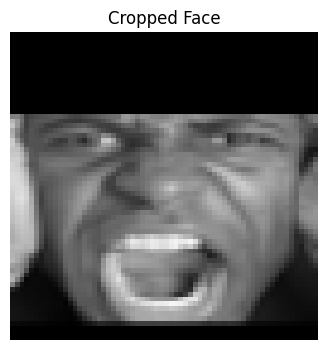

In [11]:
import matplotlib.pyplot as plt
from deepface import DeepFace

# Extract faces
face_objs = DeepFace.extract_faces(
    img_path="test/test_1_angry.png",
    detector_backend="retinaface",
    align=True,
)

# Iterate through detected faces and plot the cropped zones
cropped_face = face_objs[0]['face']  # Get the face crop (array)
if cropped_face.max() <= 1.0:  # Assuming normalized to [0, 1]
    cropped_face = (cropped_face * 255).astype('uint8')
resized_face = cv2.resize(cropped_face, output_size)
cv2.imwrite("test_1_angry.png", resized_face)
# Display the cropped face
plt.figure(figsize=(4, 4))
plt.imshow(resized_face)  # Show the face crop
plt.axis("off")  # Hide axes for better visualization
plt.title("Cropped Face")
plt.show()

In [5]:
import os
from deepface import DeepFace

# Define the test directory and valid emotions
test_dir = ""
valid_emotions = {"angry", "disgusted", "fear", "happy", "sad", "surprised", "neutral"}
correct_predictions = 0
total_predictions = 0

# Iterate through test images
for filename in os.listdir(test_dir):
    file_path = os.path.join(test_dir, filename)

    # Parse ground truth emotion from the filename
    try:
        ground_truth_emotion = filename.split("_")[2].split(".")[0]
    except IndexError:
        print(f"Skipping invalid file format: {filename}")
        continue

    if ground_truth_emotion not in valid_emotions:
        print(f"Skipping invalid emotion in filename: {filename}")
        continue

    # Perform emotion recognition using DeepFace
    try:
        analysis = DeepFace.analyze(img_path=file_path, actions=['emotion'], enforce_detection=False)
        predicted_emotion = analysis[0]['dominant_emotion']
        
        # Compare and count accuracy
        if predicted_emotion.lower() == ground_truth_emotion.lower():
            correct_predictions += 1
        total_predictions += 1

        print(f"Processed {filename}: Ground Truth: {ground_truth_emotion}, Predicted: {predicted_emotion}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
print(f"Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_predictions})")


FileNotFoundError: [Errno 2] No such file or directory: ''

In [16]:
import os
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

def inpaint_black_zones(image):
    # Create a mask for black zones
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(gray_image, 0, 5)
    
    # Inpaint black zones
    inpainted = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    return inpainted

def process_and_save_faces(input_folder, output_folder, detector_backend="retinaface", output_size=(48, 48)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all images in the input folder
    for image_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, image_name)
        
        # Check if the file is an image
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        
        try:
            # Extract faces from the image
            face_objs = DeepFace.extract_faces(
                img_path=input_path,
                detector_backend=detector_backend,
                align=True,
            )
            
            # Process each detected face
            for i, face_obj in enumerate(face_objs):
                cropped_face = face_obj['face']
                
                # Handle normalized face values
                if cropped_face.max() <= 1.0:  
                    cropped_face = (cropped_face * 255).astype('uint8')
                
                # Resize the face to the desired output size
                resized_face = cv2.resize(cropped_face, output_size)

                # # Inpaint black zones in the resized face
                # inpainted_face = inpaint_black_zones(resized_face)
                
                # Construct the output filename
                base_name, ext = os.path.splitext(image_name)
                output_filename = f"{base_name}_face{i+1}{ext}"
                output_path = os.path.join(output_folder, output_filename)
                
                # Save the processed face
                cv2.imwrite(output_path, resized_face)
                print(f"Saved face {i+1} from {image_name} to {output_path}")
        
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
            
input_folder = "test"  # Path to input folder
output_folder = "test_aligned"  # Path to output folder
process_and_save_faces(input_folder, output_folder)

Saved face 1 from train_2_angry.jpg to test_aligned/train_2_angry_face1.jpg
Error processing train_3_angry.jpg: Face could not be detected in test/train_3_angry.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Saved face 1 from train_4_angry.jpg to test_aligned/train_4_angry_face1.jpg
Saved face 1 from train_1_angry.jpg to test_aligned/train_1_angry_face1.jpg
